^C


In [2]:
from dotenv import load_dotenv 
load_dotenv()

True

In [3]:
import os

In [4]:
! streamlit run rag_chathistory_stream.py

^C


In [ ]:
| Python                                                       DataBase 
| --- DS + class + methods ..                                  --SQL
     <----------------------------DBI--------------------------->

"select *from table" //str                                    select *from table
                                                               |
                                                           +-------------------------+
                                                           |        |      |        |
                                                           +--------------------------+
     -              ---------------------<---------------------
                        tuple/list of tuple/generator 
    ...

In [7]:
import sqlite3
conn = sqlite3.connect("test1.db")
sth = conn.cursor()
sth.execute("create table prod(id NUMBER,pname text,pcost NUMBER)")

In [8]:
sth.execute("insert into prod(id,pname,pcost) values(101,'pA',1000)")

In [9]:
sth.execute("insert into prod(id,pname,pcost) values(102,'pB',4000)")
sth.execute("insert into prod(id,pname,pcost) values(103,'pC',2000)")
sth.execute("insert into prod(id,pname,pcost) values(104,'pD',3000)")

In [11]:
pid=105
pname='pE'
pcost=3450
sth.execute("insert into prod(id,pname,pcost) values(?,?,?)",(pid,pname,pcost))

In [12]:
sth.execute("select *from prod")

In [13]:
sth.fetchone()

(101, 'pA', 1000)

In [14]:
sth.fetchone()

(102, 'pB', 4000)

In [15]:
sth.execute("select *from prod")
sth.fetchall()

[(101, 'pA', 1000),
 (102, 'pB', 4000),
 (103, 'pC', 2000),
 (104, 'pD', 3000),
 (105, 'pE', 3450)]

In [16]:
sth.execute("select *from prod")
list(sth) # generator 

[(101, 'pA', 1000),
 (102, 'pB', 4000),
 (103, 'pC', 2000),
 (104, 'pD', 3000),
 (105, 'pE', 3450)]

In [17]:
def fx():
    yield 10 # Vs return 10 -->exit with 10 
    yield "Data1","Data2"
    yield "D1",["D2","D3","D4"]

fx()

<generator object fx at 0x000001FDEB7FE2C0>

In [18]:
list(fx())

[10, ('Data1', 'Data2'), ('D1', ['D2', 'D3', 'D4'])]

In [19]:
for var in fx():
    print(var)

10
('Data1', 'Data2')
('D1', ['D2', 'D3', 'D4'])


In [20]:
sth.execute("select *from prod")
for var in sth:
    print(var)

(101, 'pA', 1000)
(102, 'pB', 4000)
(103, 'pC', 2000)
(104, 'pD', 3000)
(105, 'pE', 3450)


In [21]:
conn.commit()
conn.close()

In [22]:
import sqlite3
myconn = sqlite3.connect("test1.db")
sth = myconn.cursor()
sth.execute("select *from prod")
list(sth)

[(101, 'pA', 1000),
 (102, 'pB', 4000),
 (103, 'pC', 2000),
 (104, 'pD', 3000),
 (105, 'pE', 3450)]

In [ ]:
oracle23 vector ai 
|
vector type 

pid INT
myembedding VECTOR(300) 

+--------------------+
| pid | myemedding   |
| 101 |[1,2,3,..300] |

Vector Index
     -> IVF
     -> HNSW 

import oracledb
..
myembedding vector;  

myembedding(*,*) - any number of values, int (or) float
myembedding vector(2,*) 
myembedding vector(*,int)
myembedding vector(*,float)


C:\Users\karth\AppData\Local\Temp\ipykernel_9000\2854611303.py:6: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embedding = OllamaEmbeddings(model='gemma2:2b')


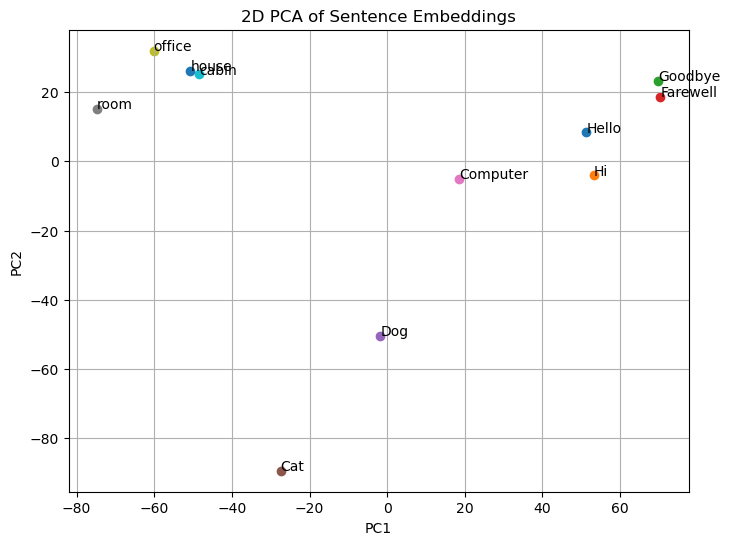

In [27]:
from langchain_community.embeddings import OllamaEmbeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get embeddings for multiple queries
embedding = OllamaEmbeddings(model='gemma2:2b')


sentences = ["Hello", "Hi", "Goodbye", "Farewell", "Dog", "Cat", "Computer","room","office",
             "cabin","house"]
vectors = [embedding.embed_query(s) for s in sentences]

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1])
    plt.text(point[0]+0.01, point[1]+0.01, sentences[i])
plt.title("2D PCA of Sentence Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [24]:
for var in enumerate([123,445,124,432]):
    print(var)

(0, 123)
(1, 445)
(2, 124)
(3, 432)


Text(2, 11.2, 'data3')

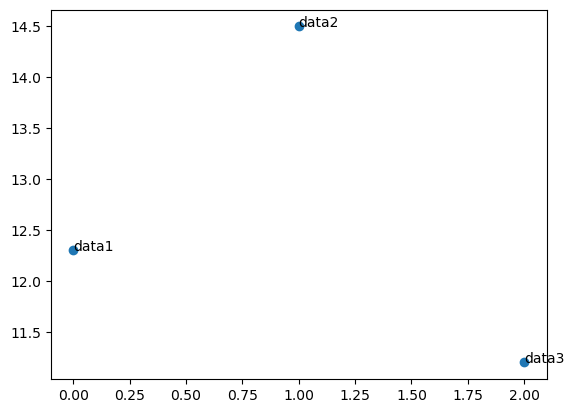

In [26]:
import matplotlib.pyplot as plt
plt.scatter([0,1,2],[12.3,14.5,11.2])
plt.text(0,12.3,"data1")
plt.text(1,14.5,"data2")
plt.text(2,11.2,"data3")

In [ ]:
//embedding = client.embeddings.create(model="text-embedding<modelname>",input=text).data[0].embedding

In [ ]:

file: demo1.py
---------------
# load your inputFile ->chunks ->stores to db
----------------

file: demo2.py
------------------
# fetching an exsting db(embedded)
# do similariry search

file: demo3.py
----------------
# QA









In [28]:
! streamlit run rag_chathistory_stream.py

^C


In [ ]:
GPT,llama,..any llm model ===> RAG appln
                                |->loaded_data_content = healthcare_products.pdf 
............................
 |-> pre-trained model         

EndUser ---> | explan about product - pA features |
             | any discount rate about this ..
             |  ....
     -----<-------

 person-1 : [200books - birds] 
    |

 business content: [5books - HealthCare]
  |
  |->re-train with 5books 
Fine-Tuning
============
1. Pre-trained model
2. DataSet 
3. Computing resource
4. Framework - Transformer 


check-point-<epoch> (or) check-point-<step>/

results/
 |->check-point-1000/
     |->config.json
     |->trainer_state.json 
     |->training_args.bin
 |->logs/

 |->


results/
 |->check-point-1000/
     |->config.json
     |->trainer_state.json 
     |->training_args.bin
 
 |->check-point-1005/
     |->config.json
     |->trainer_state.json 
     |->training_args.bin
 |->logs/

 |-> finetune_model.bin 

datasets - URL
https://www.sec.gov/data-research/sec-markets-data/financial-statement-data-sets
  